# Исследование объявлений о продаже квартир

Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определим рыночную стоимость объектов недвижимости и установим параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. - 


**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении- 

In [68]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv("data_real_estate.csv", sep = "\t")
old_data = df
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Смотрим на общие сведения**

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заметим, что далее нужно будет изменить тип данных в столбцах: first_day_exposition, is_apartment. Также некоторые столбцы со значениями float далее изменим на int.
Можно увидеть много пропусков в некоторых столбцах, с ними будем работать далее.

**Графики по данным**

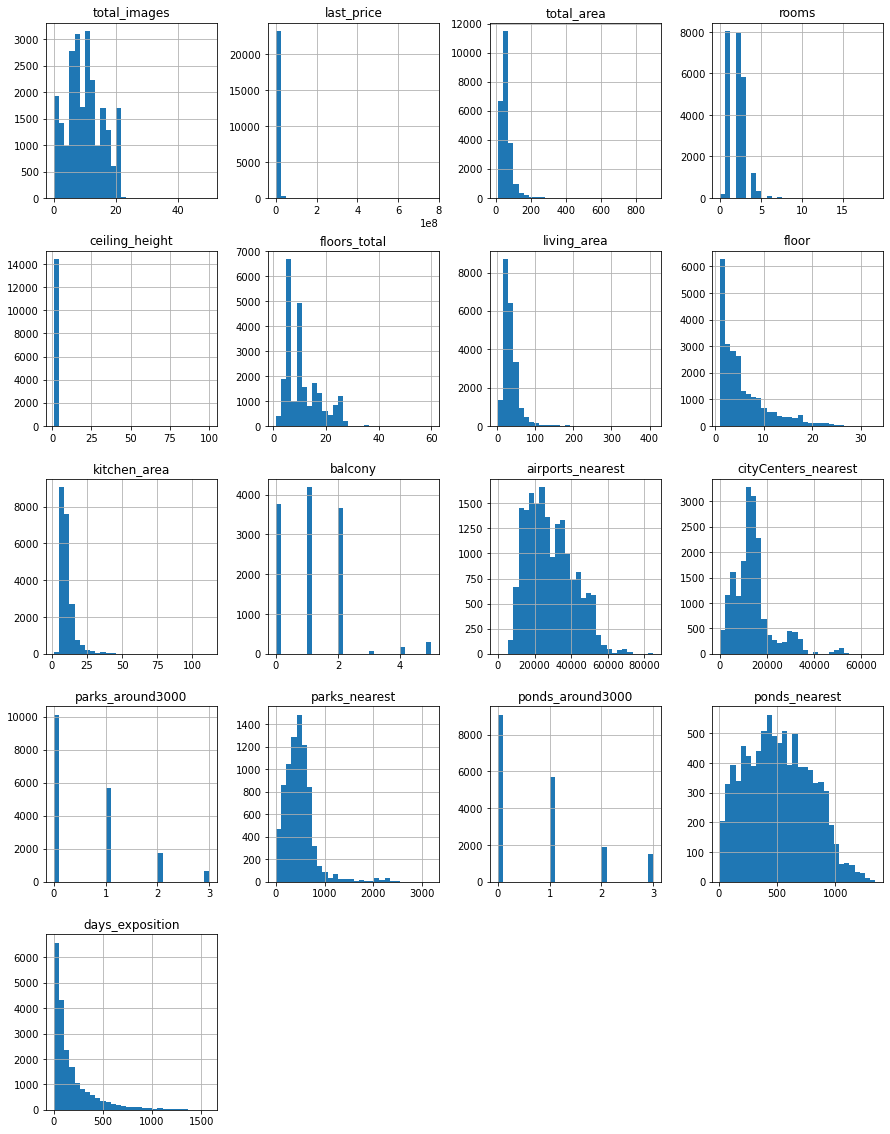

In [70]:
df.hist(figsize = (15, 20), bins = 30);

### Предобработка данных

In [71]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Переименуем столбец:

In [72]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}) # заменим название столбца

Проведём работу с пропусками:

In [73]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Далее для всех столбцов с пропущеными значениями пробеведм отдельную работу:

**1) Высота потолков**

In [74]:
display(df.corr()['ceiling_height'])
df['ceiling_height'].describe()


total_images           -0.001987
last_price              0.085430
total_area              0.095490
rooms                   0.054457
ceiling_height          1.000000
floors_total           -0.028732
living_area             0.090650
floor                  -0.011798
studio                  0.001674
open_plan               0.042777
kitchen_area            0.087641
balcony                 0.040523
airports_nearest       -0.023947
city_centers_nearest   -0.091689
parks_around3000        0.065915
parks_nearest          -0.019167
ponds_around3000        0.078209
ponds_nearest          -0.059090
days_exposition         0.019091
Name: ceiling_height, dtype: float64

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видно, что у ceiling_height корреляция со всеми дургими столбцами близка к нулю, значит взаимосвязь обозначить сложно. 
Значения ниже двух и больше 6 метров явно неправильные. Возможно вместо 32м настоящая длина равна 3.2, а превышающие 60 явно ошибочные. Напишем функцию для утсранения таких значений. Оставшиеся странные значения удалим.

In [75]:
def height(ceiling):  
    if ceiling > 10:
        return ceiling / 10
    return ceiling


count    23674.000000
mean         2.698269
std          0.231382
min          2.340000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

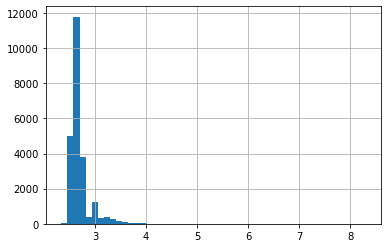

In [76]:

median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(median) # заполняем пропуски медианой

df['ceiling_height'] = df['ceiling_height'].apply(height)
df = df.query('ceiling_height > 2.3 and ceiling_height< 10') # удаляем выбивающиеся значения

df['ceiling_height'].hist(bins = 50);
df['ceiling_height'].describe()

In [77]:
df['ceiling_height'].isna().sum()


0

Теперь Распределение больше похоже на правду. Пропусков нет. 2.4 и 2.7 самые популярные высоты квартир, понятно почему там есть пики, 3 метра и больше- квартиры премиального класса.

**2) Количство этажей**

In [78]:
df['floors_total'].describe()

count    23588.000000
mean        10.674877
std          6.595804
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Заменим тип данных, ведь количество этажей не может быть вещесвтенным числом:

In [79]:
df['floors_total'] = df['floors_total'].astype('Int64')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [80]:
df.corr()['floors_total'] # посмотрми на корреляцию

total_images            0.010283
last_price             -0.007066
total_area             -0.075873
rooms                  -0.228182
ceiling_height         -0.081908
floors_total            1.000000
living_area            -0.169281
floor                   0.678210
studio                  0.070191
open_plan               0.050820
kitchen_area            0.163827
balcony                 0.194321
airports_nearest        0.108691
city_centers_nearest    0.019502
parks_around3000       -0.252864
parks_nearest           0.097334
ponds_around3000       -0.123192
ponds_nearest           0.039267
days_exposition        -0.052215
Name: floors_total, dtype: float64

Чего-то похожего между данными с пропущенными значениями в floors_total найти не удалось. Корреляции с другими значениями тоже нет. Оставим пропуски, не будем их заменять.

**3) Жилая площадь**

In [81]:
df['living_area'].describe()

count    21773.000000
mean        34.462649
std         22.037028
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

значние в 2 метра не сильно похоже на правду. пропуски и значения допустим меньше 10м можно попробовать заменить процентным соотношением жилой площади от общей умноженной на на общую площадь для квартир разделенных по определенному количесву комнат и удалить слишком маленькие.

In [82]:
print(df['rooms'].corr(df['living_area']))
df['total_area'].corr(df['living_area'])

0.8459519485042546


0.9395648152112123

Заметна сильная корреляция.

count    21682.000000
mean        34.183311
std         20.051529
min         10.080000
25%         18.700000
50%         30.000000
75%         42.300000
max        199.000000
Name: living_area, dtype: float64

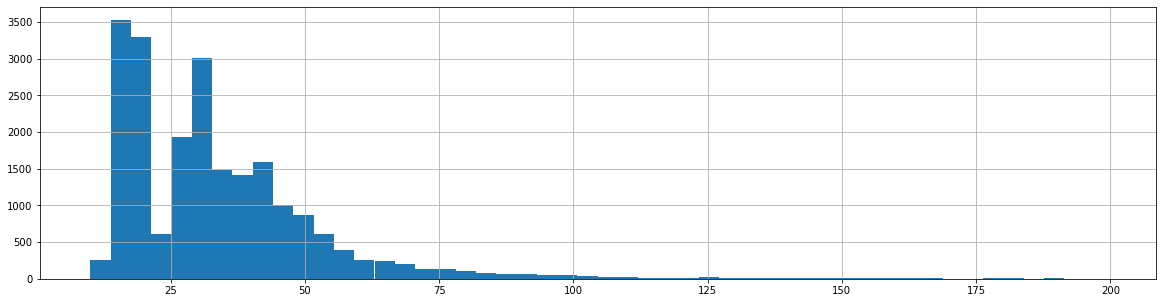

In [83]:
def area(d, r):
    for room in r:
        perc = d.loc[d['rooms'] == room, 'living_area'].sum() / d.loc[d['rooms'] == room, 'total_area'].sum()
        d.loc[d['rooms'] == room, 'living_area'] = d.loc[d['rooms'] == room, 'living_area'].fillna(perc * d['total_area'])


df['rooms'] = df['rooms'].astype('int') # заменим тип данных
df = df.query('living_area > 10 and living_area < 200') # удалим слишком выбивающиеся значния
list_rooms = list(df['rooms'].unique())
area(df, list_rooms)
df['living_area'].hist(bins = 50, figsize = (20, 5))
df['living_area'].describe()

In [84]:
df.shape[0] / old_data.shape[0]

0.9148909236676653

Второй способ:

In [85]:
#def area(d, r):
 #   for room in r:
   #     med = d.loc[d['rooms'] == room, 'living_area'].median()
   #     d.loc[d['rooms'] == room, 'living_area'] = d.loc[d['rooms'] == room, 'living_area'].fillna(med) 
        

#df['rooms'] = df['rooms'].astype('int')
#list_rooms = list(df['rooms'].unique())
#area(df, list_rooms)
#df['living_area'].hist(bins = 50)
#df['living_area'].describe()     почти одинаковый результат

In [86]:
df['living_area'].isna().sum()

0

**5) Апартаменты ли?**

Заменим отсутствующие значения на false

In [87]:
df['is_apartment'] = df['is_apartment'].fillna(False) 

In [88]:
df['is_apartment'].isna().sum()

0

**6) Площадь кухни**

In [89]:
df['kitchen_area'].describe()

count    20888.000000
mean        10.463653
std          5.657643
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [90]:
df.corr()['kitchen_area']

total_images            0.109600
last_price              0.522529
total_area              0.593581
rooms                   0.244965
ceiling_height          0.320438
floors_total            0.175891
living_area             0.391155
floor                   0.141176
is_apartment            0.036619
studio                       NaN
open_plan                    NaN
kitchen_area            1.000000
balcony                 0.096303
airports_nearest        0.007340
city_centers_nearest   -0.190082
parks_around3000        0.083437
parks_nearest           0.034218
ponds_around3000        0.145143
ponds_nearest          -0.099022
days_exposition         0.105585
Name: kitchen_area, dtype: float64

Заметим, что то же самое как мы сделали с living_area мы сделтаь не можем, так как корреляция слишком мала, мы только испортим данные, так что придется оставить их.

In [91]:
df['kitchen_area'].isna().sum()

794

**7) Количество балконов**

Замени пустые значения на 0

In [92]:
df['balcony'] = df['balcony'].fillna(0)

In [93]:
df['balcony'].isna().sum()

0

In [94]:
df['balcony'].value_counts()

0.0    13619
1.0     4040
2.0     3493
5.0      280
4.0      176
3.0       74
Name: balcony, dtype: int64

**8) Сколько дней прошло до снятия объявления**

In [95]:
df['days_exposition'].describe()

count    18714.000000
mean       184.924068
std        221.330338
min          1.000000
25%         44.000000
50%        101.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

days_exposition - дни от начала до снятия, значит строки в которых стоит пропуск означают, что объявления еще не снято. Если бы мы знали дату создания этих данных, то можно было бы создать новый столбец, который показывает общее количестов дней объявления. Оставим эти значения такими же как и были.

In [96]:
df['days_exposition'].isna().sum()

2968

Удалять ничего не будем.

**9) Окончательная цена**

In [97]:
df.shape[0] / old_data.shape[0]

0.9148909236676653

In [98]:
df['last_price'].describe()

count    2.168200e+04
mean     6.328046e+06
std      7.922666e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Удалим квартиры с ценой меньше одного миллиона рублей, на рынке просто не найти таких объявлений.

In [99]:
df = df.query('last_price > 500000')

**10) Общая площадь**

In [100]:
df['total_area'].describe()

count    21670.000000
mean        59.625425
std         31.380333
min         14.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        413.500000
Name: total_area, dtype: float64

После удаленияя значений в столбце с жилой площадью, значения в данном столбце стали более похожи на правду, поэтому ничего с ним делать не будем.

**11) Количество комнат**

In [101]:
df['rooms'].value_counts()

1     7326
2     7276
3     5359
4     1084
5      287
0      180
6       95
7       41
8       10
9        5
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64

Комнат не может быть 0, также значений больше 7 - слишком мало, они могут вызвать неожиданные всплески при будущей работе, избавимся от них:

In [102]:
df = df.query('0 < rooms < 8 ')
df['rooms'].value_counts()

1    7326
2    7276
3    5359
4    1084
5     287
6      95
7      41
Name: rooms, dtype: int64

**Поменям теперь типы данных**

In [103]:

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')# сделаем вид времени более правильным и понятным
df['balcony'] = df['balcony'].astype('int')# этот столлбец не может содержать вещесвтенных чисел
df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')# здесь не может быть вещесвтенных значений
df['parks_around3000'] = np.floor(pd.to_numeric(df['parks_around3000'], errors='coerce')).astype('Int64')#здесь не может быть вещесвтенных значений
df['ponds_around3000'] = np.round(pd.to_numeric(df['ponds_around3000'], errors='coerce')).astype('Int64')#здесь не может быть вещесвтенных значений

In [104]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21468 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21468 non-null  int64         
 1   last_price            21468 non-null  float64       
 2   total_area            21468 non-null  float64       
 3   first_day_exposition  21468 non-null  datetime64[ns]
 4   rooms                 21468 non-null  int32         
 5   ceiling_height        21468 non-null  float64       
 6   floors_total          21417 non-null  Int64         
 7   living_area           21468 non-null  float64       
 8   floor                 21468 non-null  int64         
 9   is_apartment          21468 non-null  bool          
 10  studio                21468 non-null  bool          
 11  open_plan             21468 non-null  bool          
 12  kitchen_area          20857 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55


In [105]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21468.000000,2.146800e+04,21468.000000,21468.000000,21468.000000,21417.000000,21468.000000,21468.000000,20857.000000,21468.000000,16660.000000,16679.000000,16680.000000,7395.000000,16680.000000,8284.000000,18520.000000
mean,10.040386,6.337681e+06,59.686909,2.076719,2.697737,10.605314,34.187610,5.869061,10.454475,0.612772,28790.406423,14266.008094,0.608633,487.823529,0.762590,519.868783,185.348002
std,5.676928,7.915767e+06,30.654775,1.012859,0.230609,6.539415,19.674013,4.848547,5.641365,0.966962,12658.931977,8681.563194,0.799348,337.800472,0.935662,276.765032,221.367450
min,0.000000,5.200000e+05,14.000000,1.000000,2.400000,1.000000,10.080000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.490000e+06,40.100000,1.000000,2.600000,5.000000,18.800000,2.000000,7.000000,0.000000,18539.000000,9360.500000,0.000000,287.000000,0.000000,298.000000,45.000000
50%,10.000000,4.680000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26711.000000,13118.000000,0.000000,451.000000,0.000000,503.000000,102.000000
75%,14.000000,6.770690e+06,69.717500,3.000000,2.700000,15.000000,42.400000,8.000000,12.000000,1.000000,37268.000000,16275.000000,1.000000,610.000000,1.000000,731.250000,239.000000
max,50.000000,3.300000e+08,413.500000,7.000000,8.300000,60.000000,198.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Уникальныe значения и неявные дубликаты**

In [106]:
df['locality_name'] = df['locality_name'].str.lower()
df.drop_duplicates(subset = ['locality_name'])
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','поселок')

In [107]:
df.duplicated().sum()

0

Дубликатов не обнаружили

**Вывод: данные были очищены от аномальных значений, дальнейшие результаты будут более понятными теперь. Типы данных также были исправлены, там где это можно было сделать.**




In [108]:
df.shape[0] / old_data.shape[0] # сколько данных удалили

0.9058610067935355

### Посчитаем и добавим в таблицу новые столбцы

**Добавим новые столбцы**

In [109]:
df['metre_price'] = df['last_price'] // df['total_area'] # цена квардратного метра
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,95065.0


In [110]:
df['day'] = df['first_day_exposition'].dt.weekday # день недели
df['month'] = df['first_day_exposition'].dt.month # месяц
df['year'] = df['first_day_exposition'].dt.year # год
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.0,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.0,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,95065.0,0,9,2018


Напишем фунукцию, чтобы создать новый столбец по типу этажа квартиры:

In [111]:
def f(d):
     if pd.isna(d[8]) == False and pd.isna(d[6]) == False:
        if d[8] == 1:
            return 'первый'
        elif d[6] == d[8]:
            return 'последний'
        return 'другой'


In [112]:
        
df['floor_type'] = df.apply(f, axis = 1)
df['floor_type'].unique()

array(['другой', 'первый', 'последний', None], dtype=object)

Добавимстолбец, с количестов килоометров до центра и сделаем значения целыми числами, это юудет удобно для будущей работы над данными.

In [113]:
df['city_centers_nearest_km'] = df['city_centers_nearest']//1000
df['city_centers_nearest_km'] = np.ceil((pd.to_numeric(df['city_centers_nearest_km'], errors='coerce'))).astype('Int64')

In [114]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,day,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.0,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.0,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.0,3,8,2015,другой,13
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,1,6,2018,другой,8
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,95065.0,0,9,2018,другой,<NA>


**Вывод: в таблицу были добавлены ноаве столбцы: тип этажа, количество километров до центра, цена квадратного метра, день, месяц и год.**


### Проведем исследовательский анализ данных

In [115]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,day,month,year,city_centers_nearest_km
count,21468.000000,2.146800e+04,21468.000000,21468.000000,21468.000000,21417.000000,21468.000000,21468.000000,20857.000000,21468.000000,16660.000000,16679.000000,16680.000000,7395.000000,16680.000000,8284.000000,18520.000000,2.146800e+04,21468.000000,21468.000000,21468.000000,16679.000000
mean,10.040386,6.337681e+06,59.686909,2.076719,2.697737,10.605314,34.187610,5.869061,10.454475,0.612772,28790.406423,14266.008094,0.608633,487.823529,0.762590,519.868783,185.348002,9.909230e+04,2.550587,6.417691,2017.347773,13.770490
std,5.676928,7.915767e+06,30.654775,1.012859,0.230609,6.539415,19.674013,4.848547,5.641365,0.966962,12658.931977,8681.563194,0.799348,337.800472,0.935662,276.765032,221.367450,4.681420e+04,1.782903,3.464287,1.050802,8.684644
min,0.000000,5.200000e+05,14.000000,1.000000,2.400000,1.000000,10.080000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.018500e+04,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.490000e+06,40.100000,1.000000,2.600000,5.000000,18.800000,2.000000,7.000000,0.000000,18539.000000,9360.500000,0.000000,287.000000,0.000000,298.000000,45.000000,7.704900e+04,1.000000,3.000000,2017.000000,9.000000
50%,10.000000,4.680000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26711.000000,13118.000000,0.000000,451.000000,0.000000,503.000000,102.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.770690e+06,69.717500,3.000000,2.700000,15.000000,42.400000,8.000000,12.000000,1.000000,37268.000000,16275.000000,1.000000,610.000000,1.000000,731.250000,239.000000,1.137410e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,413.500000,7.000000,8.300000,60.000000,198.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,65.000000


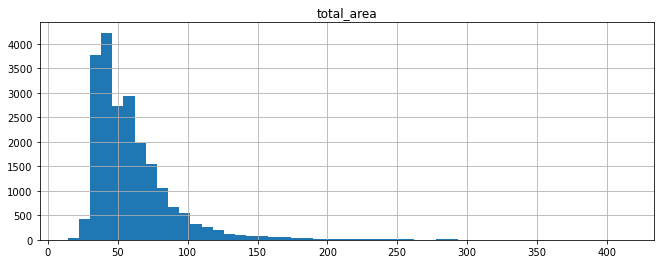

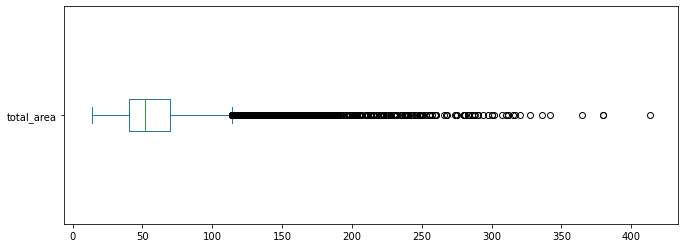

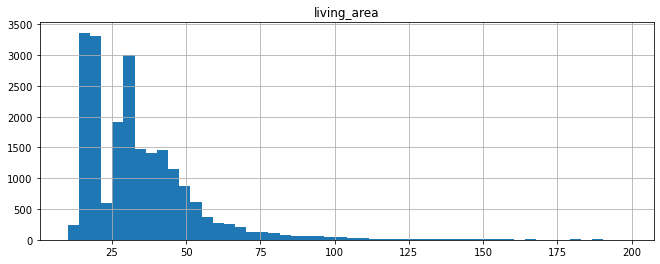

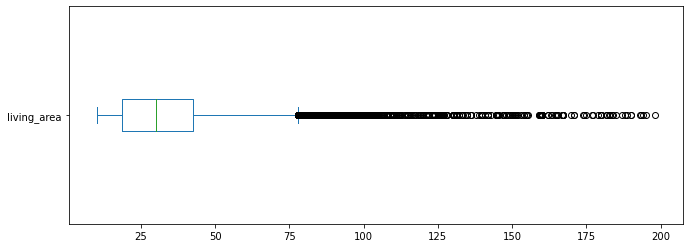

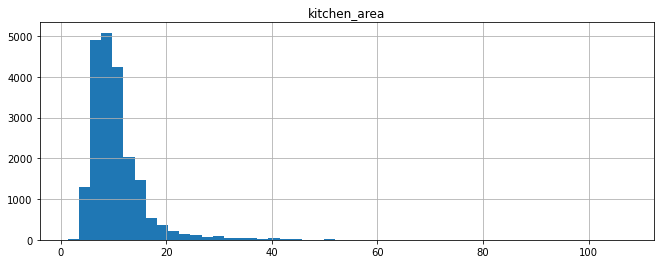

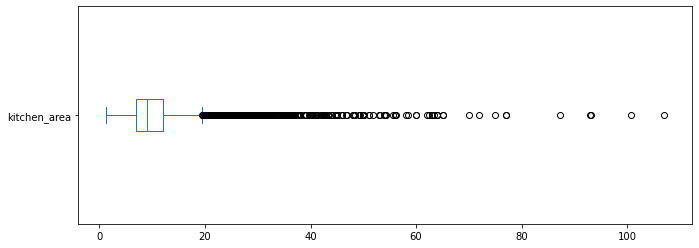

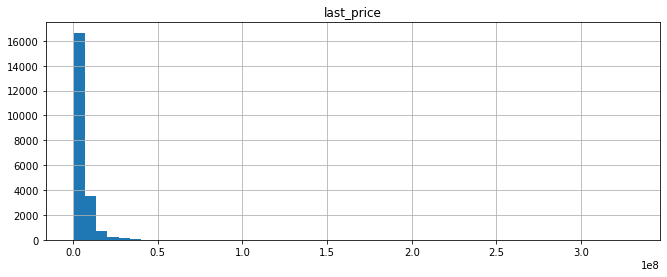

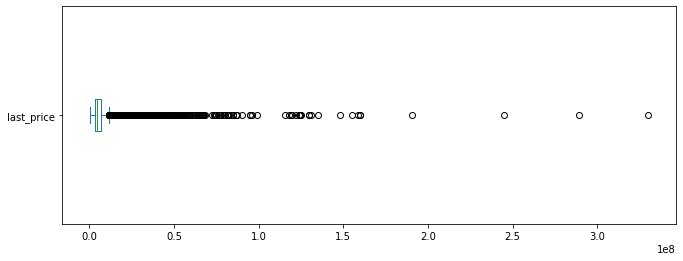

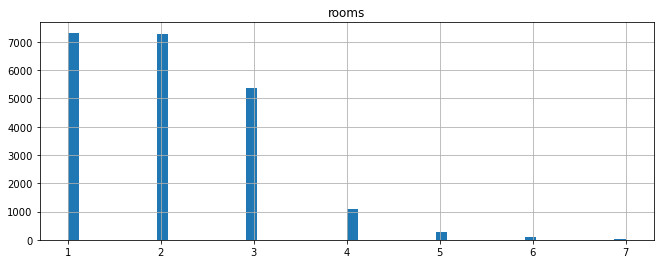

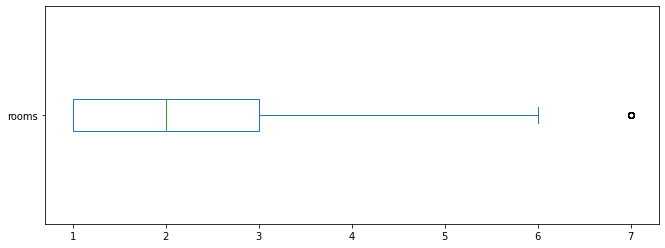

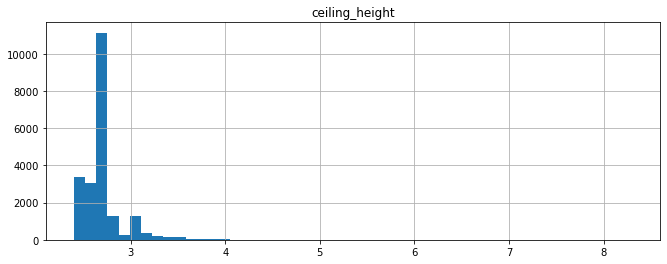

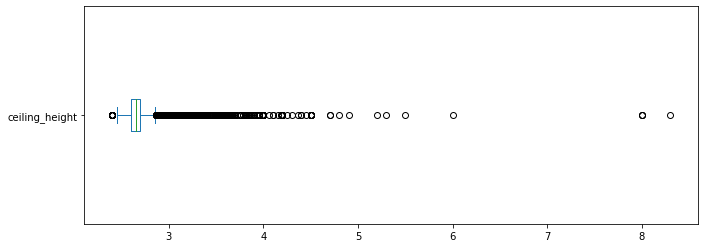

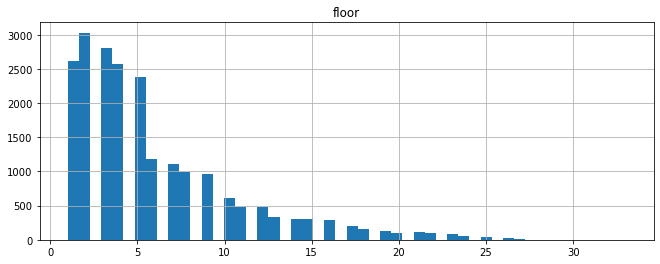

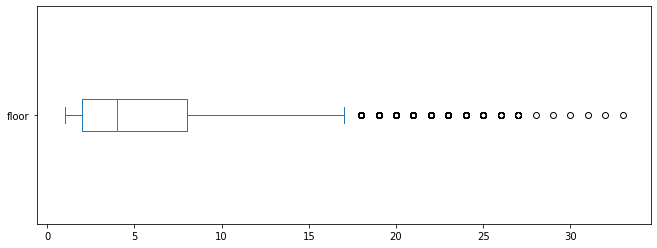

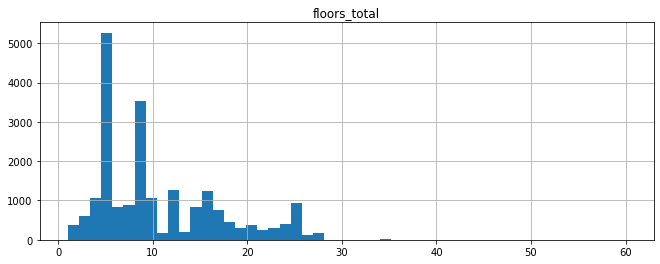

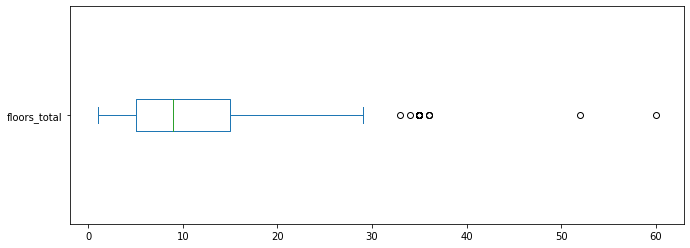

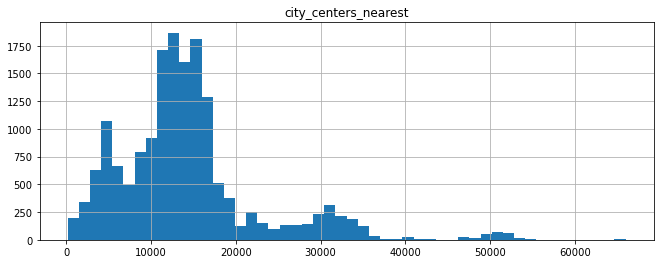

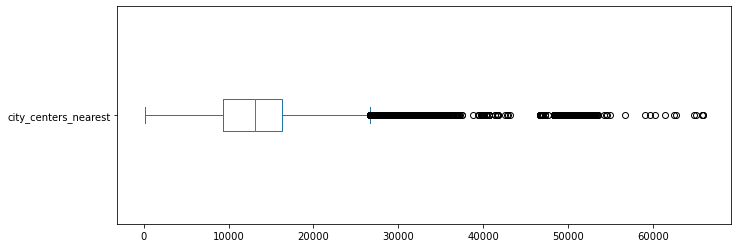

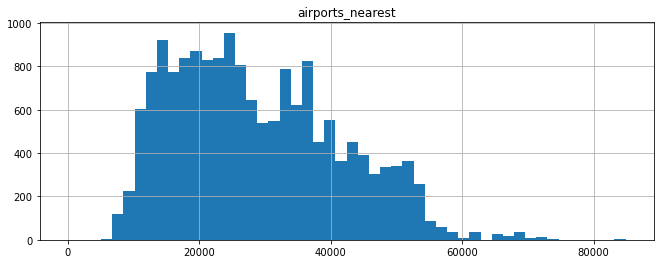

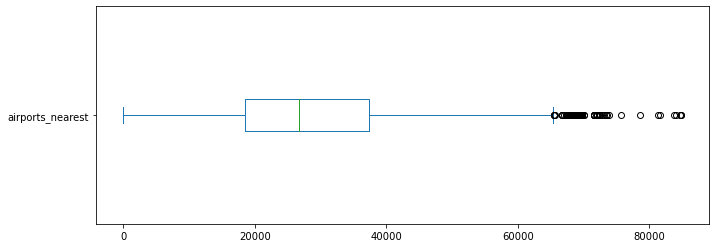

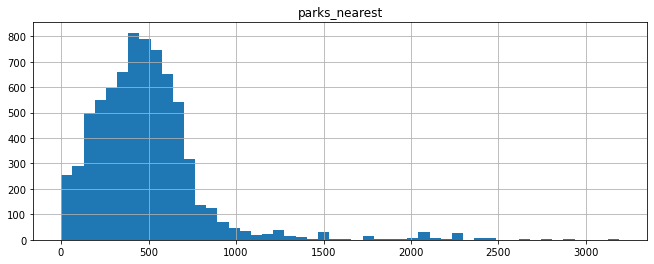

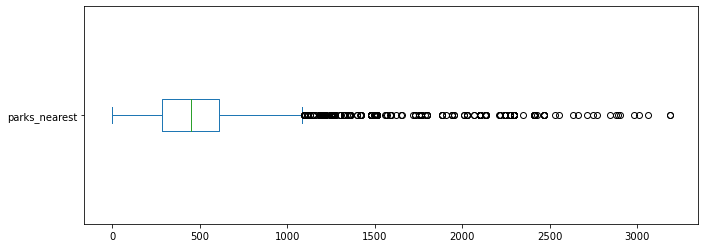

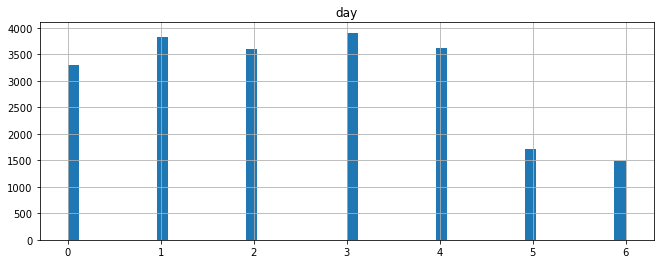

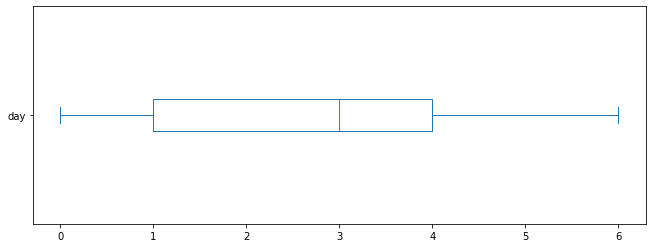

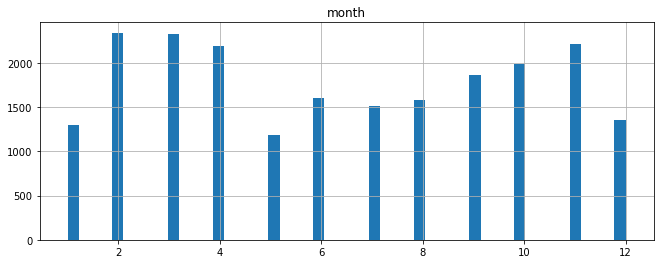

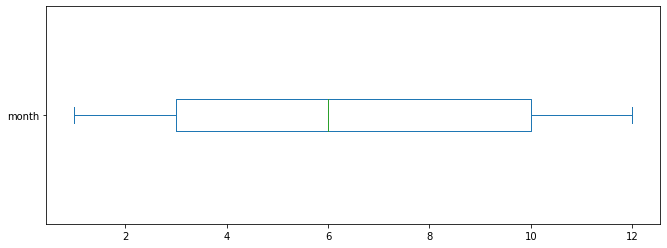

In [116]:
cols = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height',
        'floor', 'floors_total', 'city_centers_nearest','airports_nearest', 'parks_nearest', 'day', 'month' ]



for col in cols:
    df.hist(col, bins = 50, figsize = (11, 4))
    plt.show()
    df[col].plot(kind = 'box', vert = False, figsize = (11, 4))
    plt.show()

Можно заметить, что на всех графиках есть аномальные значения. Постараемся потсроить графики без них.

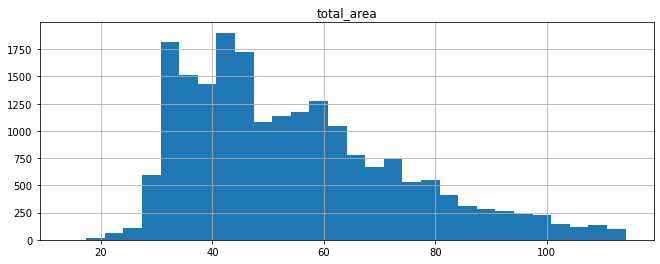

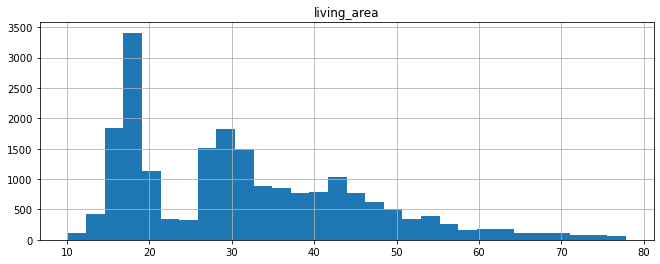

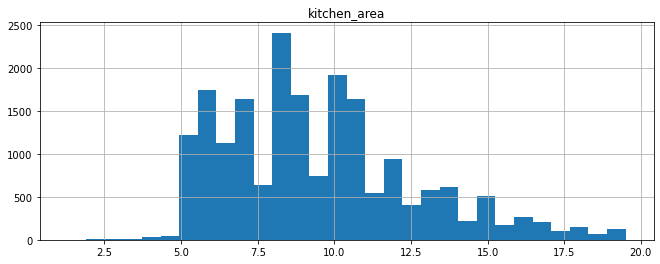

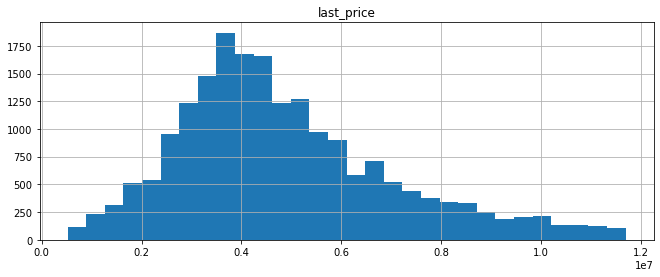

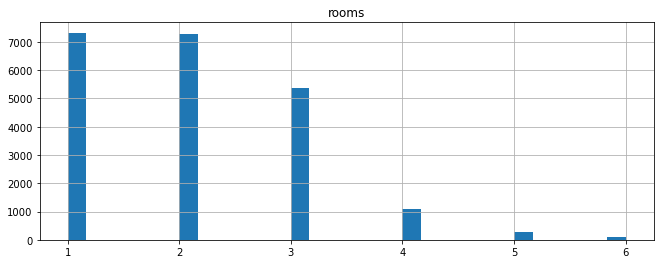

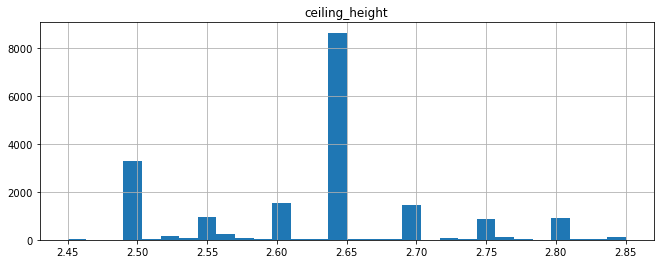

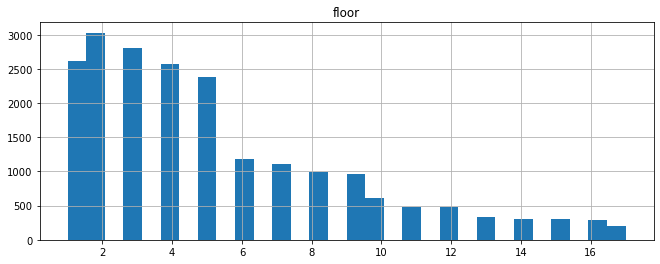

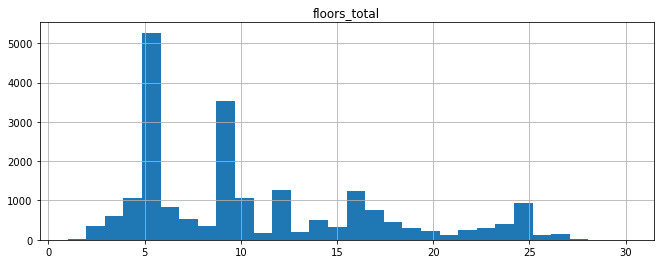

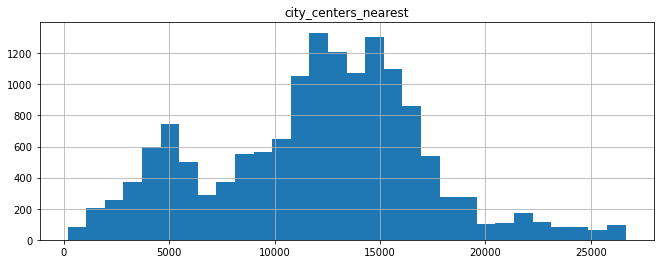

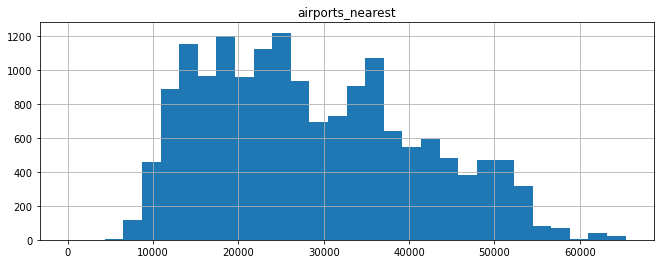

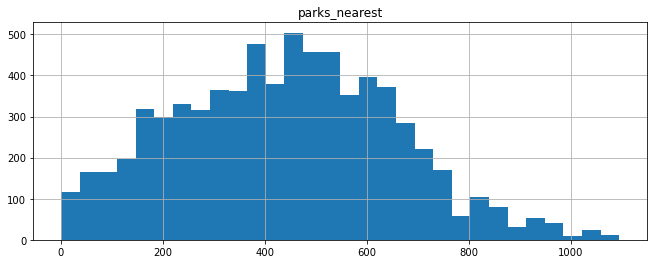

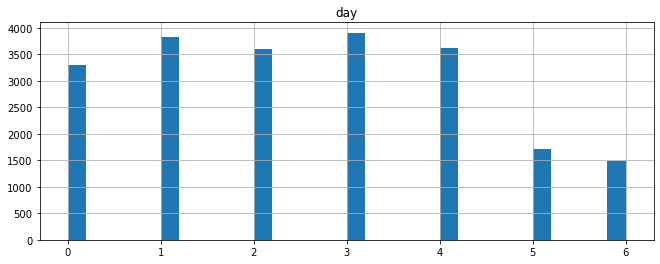

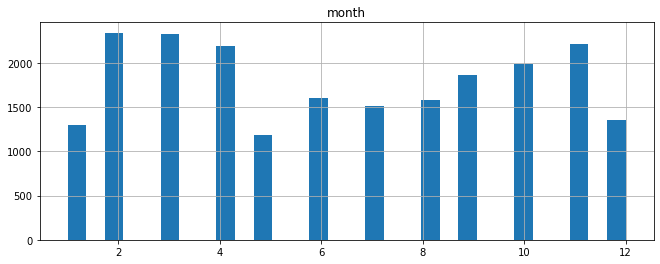

In [117]:
dn = df.loc[:, ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height',
        'floor', 'floors_total', 'city_centers_nearest','airports_nearest', 'parks_nearest', 'day', 'month' ]]

for col in dn:
   
    iqr = df[col].quantile(.75) - df[col].quantile(.25) 
   
    minn = df[col].min() 
    q1 = df[col].quantile(.25) - iqr * 1.5
    
    if q1 < minn:
        q1 = minn
   
   
    maxx = df[col].max() 
    q3 = df[col].quantile(.75) + iqr * 1.5
    
    if q3 > maxx:
        q3 = maxx
    
       
    df.hist(col, bins = 30, range = ((q1), (q3)), figsize = (11,4))

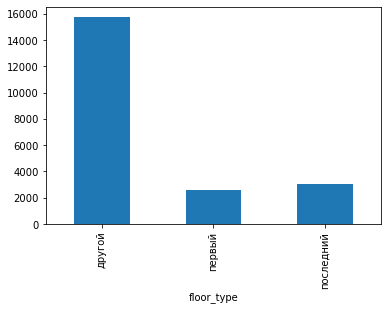

In [118]:
df.groupby(by='floor_type')['floor_type'].count().plot(kind='bar');

* **общая площадь**
    *  Можно заметить, что наиболее встречаемая площадь квартиры составляет от 30 до 60 метров. Пик приходится на 40 метров. Данные очень похоже на правду. Существуют и квартиры с площадью более 200 метров, встречаются они очень редко, это нормально, просто квартиры премиум класса. Выбросов нет.
    
    
* **жилая площадь**
    * Видно, что большинстов квартир имеют жтлую площадь от 15 до 45 метров, в принципе логичные результаты. Квартиры с жилой площадью встречаются реже, но они сущесвтуют. Жилая площадь сопоставима с общей, мы можем наблюдать правдободобные значения. Выбросов нет.
    
    
* **площадь кухни**
    * Площадь кухни - тут все закономерно, это какая-то часть общей площади, гистограммы выглядят правдободобными. Самые чыстые результаты от 5 до 15 метров квадратных, реже кухни площадью от 20 метров квадратных. Выбросов попрежнему нет.
    
    
* **цена**
    * Цена на квартиры в большинстве случаем существует от 2 миллионов до 7, что кажется правдной. Можно заметить, что есть квартиры дороже, цены доходят до 330 миллионов, можно допустить, что это правда. таких квартир не особо много. Не могу посчитать это выбросами.
    
    
* **количество комнат**
    * Больше всего квартир имеют 1 или две комнаты, 3 и 4 встречаются тоже не так уж и редко. Квартиры, где комнат больше 4 можно повстрчеать с редкостью, но такие сущесвтуют, максимум комнат в представленных данных достигает числа 7. Выбросов не обнаружено.
    
    
* **высота потолков**
    * С высотой потолков была проведена небольшая работа выше, теперь мы можем наблюдать вполне логичные и адекватные значения. Самые популярные высоты лежат от 2.5 до 2.8 метров. Выбросов нет.
    
    
* **этаж**
    * Интересно заметить, что чем больше объявлений, тем ниже этаж. Возможно есть корреляция с общим количестовм этажей, поэтому гистограмма и выглядит так. Минимальное и максимальное значения ранвы 1 и 33 соответственно. Выбросов нет.
    
    
* **общее количестов этажей**
    * По гистограммам можно заметить, что есть пики в значениях количества этажей 5 и 7. В принципе это огично, потому что птосроенеи домов в большинстве случаем было по опредлелнному типу. Разброс находится в значениях от 1 до 60 этажей. Выбросов не найдено.
    
    
* **расстояние до центра**
    * Наиболее встречающиеся значения расстояния до центра лежат в интервале от 10 до 17 км. Самые большие расстояния доходят до 65 км, а самые близкие почти равны 200 метрам. Выбросов не обнаружено.
    
    
* **расстояние до аэропорта**
    * Большой всплеск значений от 10 до 60 км, в принципе выглядит все логично. Скажем, что выбросов нет.
    
    
* **расстояние до парка**
    * Расстояние находится в значнеиях от 1 до 1000 метров, выбросов все также нет, максимум доходит да трех километров. Такие маленькие значения можно объяснить тем, что дом находит или в саоммо парке, что возможно, или сразу у входа в него.
    
    
* **день**
    * В такие дни как суббота и воскресенье, то есть выхоные частота публикации объявлений значительно ниже, чем в другие дни. Можно объяснить тем, что на выходных люди больше находятся в расслабленном состоянии, а не в рабочем как в остальных днях. Аномальных значнией нет.
    
    
* **месяц**
    * Интересное распределение можно заметить в месяцах выкладывания аобъявлений. Самые частые были выложены в осень и весну. Остальные значения распределены почти одинаково, нет каких-то выбивающихся результатов. Аномальных значний тоже нет. К лету цена падает, а после лета наоборот возрастает.

* **тип этажа**
    * Очевидно, что других типов больше чем первого или последнего.

























median    102.000000
mean      185.348002
Name: days_exposition, dtype: float64


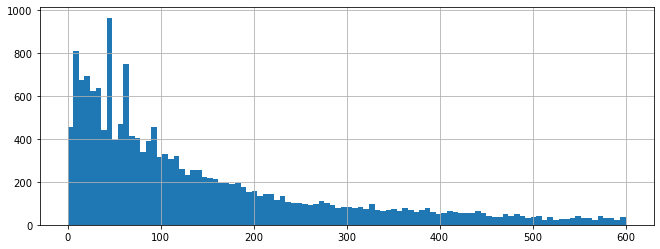

In [119]:
print(df['days_exposition'].agg(['median', 'mean']))
df['days_exposition'].hist(bins = 100, range = (0, 600), figsize = (11, 4));

Среднее отличается от медианы почти в два раза, возможно из-за того, что в данных есть какие-то слишком большие значнеия. Очень странно наблюдать за тремя пиками на гистограмме, значения явно в несколько раз больше, чем остальные, посмотрим что за значнеия такие.

In [120]:
df['days_exposition'].value_counts().head(15)

45    533
60    343
7     206
30    197
4     168
3     148
90    139
14    138
5     137
20    132
9     128
8     127
18    121
11    119
15    118
Name: days_exposition, dtype: Int64

Очень странно, что 45 дней - всречается такое огромное количество раз, значения в 60, 7, 90, 30 - тоже выбиваются. Никакой закономерности между тими днями я найти не могу. Я бы спросил у человека, который добывал эти данные, что с ними  и почему эти значения встречаюся так часто. Быстырыми продажами я бы считал проданные менее чем за сто дней, остальные же считал бы долгими, на гистограмме можно наблюдать длинный хвост из больших значений после 100 дней. 

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

In [121]:
def graf(column, d, kind, alpha, cor):
    if cor:
        c = d[column].corr(d['last_price'])
        print(f'корреляция равна {c:0.2%}')
    
    
    pt1 = d.pivot_table(index = column, values = 'last_price', aggfunc = 'median')
    pt2 = d.pivot_table(index = column, values = 'last_price', aggfunc = 'mean')
    
    if kind == 'line':
        pt3 = d.pivot_table(index = column, values = 'last_price', aggfunc = ['mean', 'median'])
        pt3.plot.line()
        
    if kind == 'bar':
        pt1.plot(y = 'last_price', kind = kind, title = 'median')
        plt.show()
        pt2.plot(y = 'last_price', kind = kind, title = 'mean')
        plt.show()
   
    if kind == 'scatter':
        d.plot(kind = kind, x = column, y = 'last_price', alpha = alpha, figsize = (12, 6))
    
    
    
columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'year', 'month', 'day']


корреляция равна 67.78%


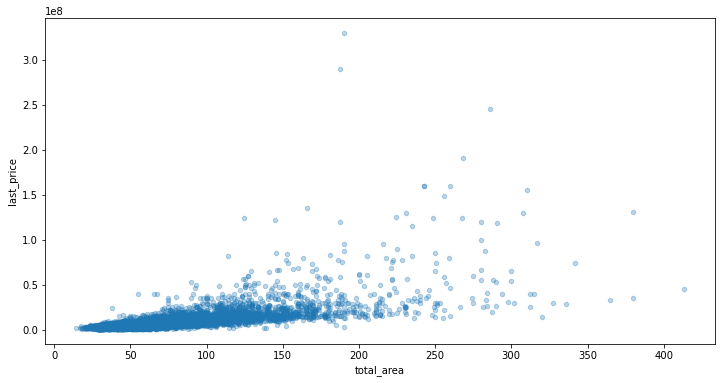

In [122]:
graf('total_area', df, 'scatter', 0.3, 1)

Корреляция не слишком большая, хотя график показывает, что все таки чем больше площадь, тем больше и цена квавртиры, зависимость есть.

корреляция равна 59.01%


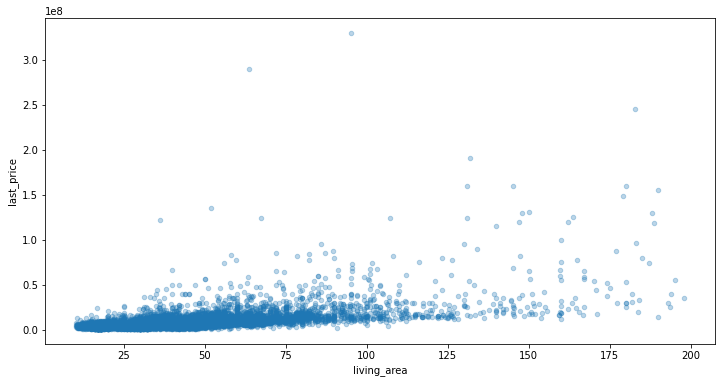

In [123]:
graf('living_area', df, 'scatter', 0.3, 1)

Корреляция еще меньше, но на графике также можно заметить, что при увеличении жилой площади, увеличивается и стоимость квартиры.

корреляция равна 52.09%


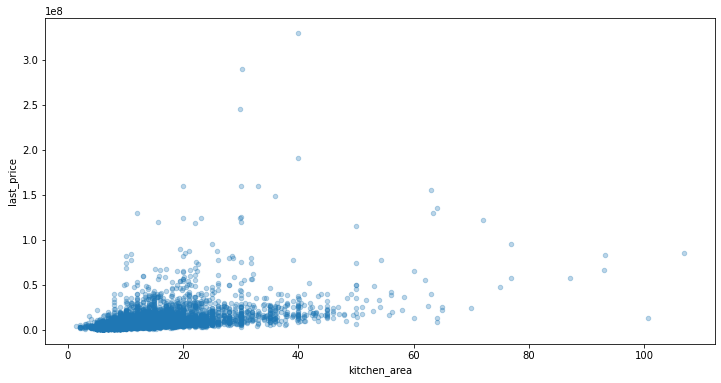

In [124]:
graf('kitchen_area', df, 'scatter', 0.3, 1)

Корреляция меньше чем в предыддущих случаях. По графику можно заметить, что с площадью растёт и цена.

корреляция равна 39.19%


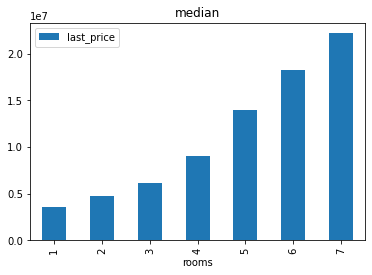

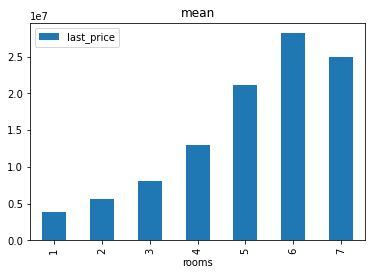

корреляция равна 39.19%


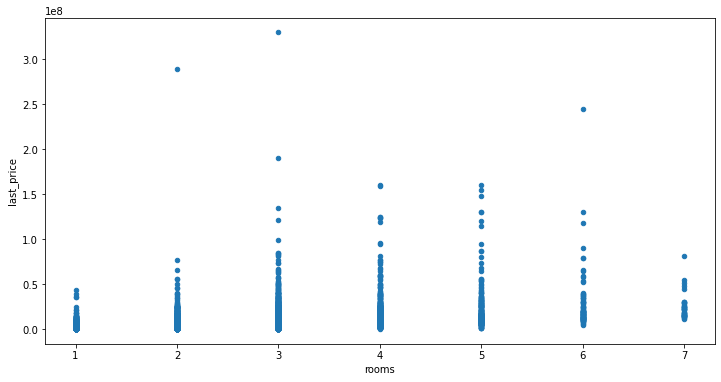

In [125]:
graf('rooms', df, 'bar', 0, 1)
graf('rooms', df, 'scatter', 1, 1)

От первой до 7-8 комнат, наблюдая за ценой можно утверждать, что есть положительная корреляция. Зависимость с помощью полученных гистограмм заметна четкая.

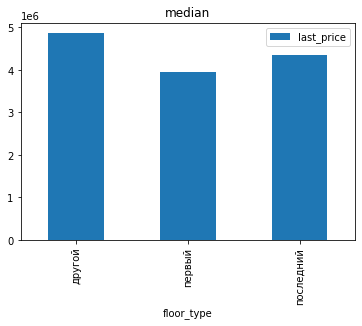

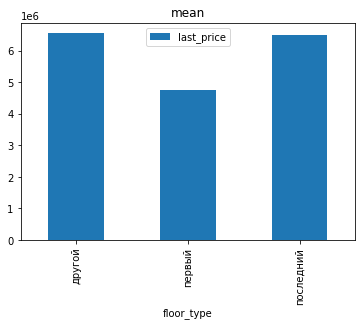

In [126]:
graf('floor_type', df, 'bar', 0, 0)


Логичный результат, большинство хочет квартиру не на первом этаже, поэтому квартиры на этажах кроме первого стооят дороже.

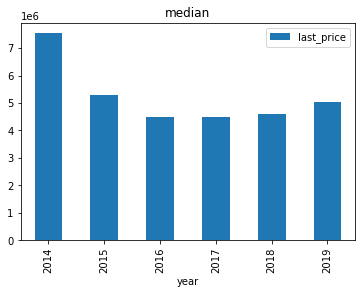

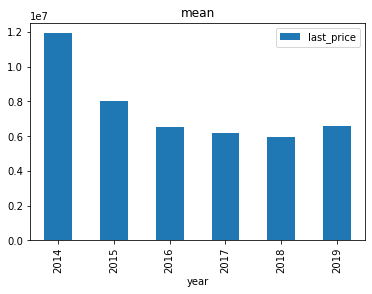

In [127]:
graf('year', df, 'bar', 0.5, 0)

На корреляцию не смотрим, так как здесь считать её бессмысленно. Можно заметить, что цена по значениям медианы и среднего уменьшается с течением времени, каждый год цена все меньше и меньше. После 2018 цена начинает расти.

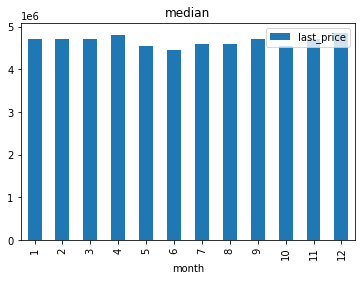

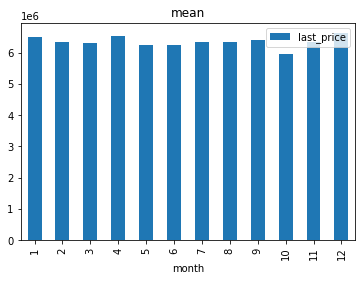

In [128]:
graf('month', df, 'bar', 0.5, 0)

Смотря на медиану и среднее, ничего про зависимость цены от месяца сказать нельзя

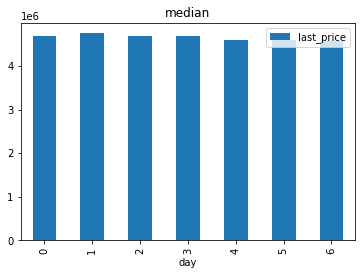

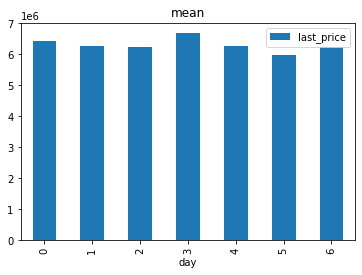

In [129]:
graf('day', df, 'bar', 0.5, 0)

Никакой зависимости по линии медианы или среднего определить не удалось.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Найдём 10 населенных пунктов с наибольшим числом объявлений:

In [130]:
names = df.groupby('locality_name')['metre_price'].count().sort_values(ascending = False).head(10)
names

locality_name
санкт-петербург      14373
поселок мурино         464
поселок шушары         400
всеволожск             365
пушкин                 343
колпино                327
поселок парголово      297
гатчина                292
деревня кудрово        245
петергоф               197
Name: metre_price, dtype: int64

In [131]:
print('средняя цена равна', df.query('locality_name in @names.index')['metre_price'].mean())

средняя цена равна 108424.30907935041


Населенные пункты с самой высокой и низкой стоимостью квартиры. 

In [132]:
f1 = df.query('metre_price == metre_price.max()')
f2 = df.query('metre_price == metre_price.min()')
print('населенный пункт с квартирой минимальной по цене квадратного метра:', f1['locality_name'].to_string(index = False),'по цене', f1['metre_price'].to_string(index = False))
print('населенный пункт с квартирой минимальной по цене квадратного метра:', f2['locality_name'].to_string(index = False),'по цене', f2['metre_price'].to_string(index = False))

населенный пункт с квартирой минимальной по цене квадратного метра: санкт-петербург по цене 1736842.0
населенный пункт с квартирой минимальной по цене квадратного метра: сланцы по цене 10185.0


,city_centers_nearest_km,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
mean,last_price,2.310246e+07,18736378.6,1.501441e+07,1.122713e+07,1.272339e+07,1.338354e+07,1.346591e+07,1.153477e+07,8.448582e+06,6.399626e+06,6.336524e+06,5.955129e+06,6.001040e+06,6.034864e+06,5.724712e+06,5.542212e+06,5.452281e+06,4929316.5,5.441349e+06,4.688243e+06,6.241021e+06,5.047931e+06,5372150.0,4.242889e+06,3.883684e+06,4.126745e+06,3575000.0,8300000.0,4910500.0,3.833333e+06
median,last_price,1.150000e+07,10770000.0,9.500000e+06,8.420000e+06,9.570000e+06,8.900000e+06,7.600000e+06,7.585000e+06,6.500000e+06,5.050000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.200000e+06,4.900000e+06,4.800000e+06,4.680000e+06,4500000.0,4.500000e+06,4.499500e+06,5.850000e+06,4.600000e+06,4995000.0,4.100000e+06,3.350000e+06,3.500000e+06,3975000.0,8300000.0,4775000.0,4.200000e+06


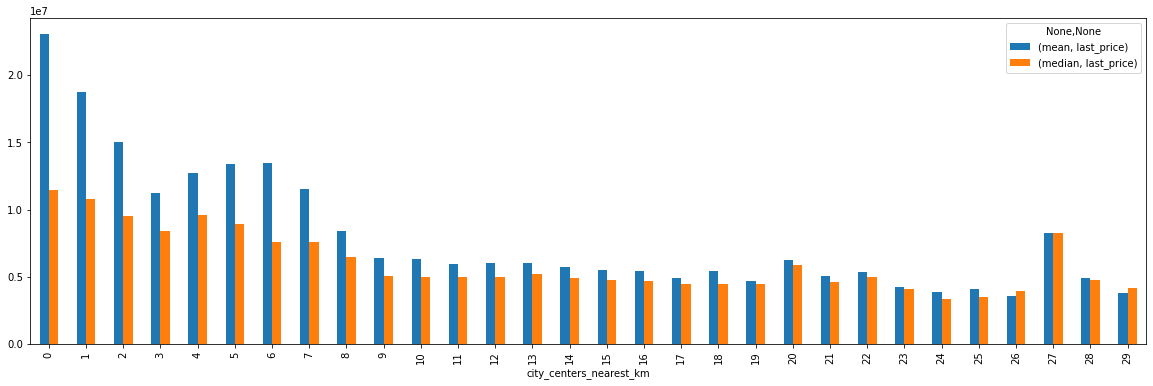

In [133]:
table = df.query('locality_name == "санкт-петербург"').pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = ['mean','median'])
table.plot(kind = 'bar', figsize = (20,6));
display(table.transpose())

Очевидно, что чем ближе к центру, тем цена на квартиру больше, это можно увидеть и по гистограмме. Есть странное значение в три километра, но возможно там просто мало данных.

**Вывод: для запрашиваемых столбцов были визуализированны данные при помощи гистограмм, были определены нормальные значения в кажом из них и рассуждения о выбросах. Были обнаружены странные пики в количесвте дней снятия объявления, объявление провесевшее более 100 дней мы посчитали слишком долгим. Больше всего на стоимость квартиры влияют общая площадь, количество комнат, этаж. Средняя цена по 10 населенным пунктам с максимальным количеством объявлений равна 108424.309. В Санкт-Петербурге была обнаружена самая дорогая квартира, а в населенном пункте Сланцы с самой дешевой. Также определили, что чем ближе квартира к центру, тем больше её цена, на примере города Санкт-Петербург**


### Общий вывод
__В данном проекте была проделана работа над данными: в них были заменены аномальные значения на более логичные, некоторые пропуски были оставлены, типы данных были зменены более подходяшими. По некоторым вопросам есть вопросы к тем, кто добывал эти данные.По данным были построены различные типы графиков. Подробнее:__


* Пропуски в выосте потолков были заполнены медианным значением, значение больше 10 были поделены на 10, после этого высоты выше 6 и ниже 2,4 были устранены. Найдены пики в значениях 2.4 и 2.7.
 
 
* В значения жилой площади былы найдены хорошие коэффиценты корреляции с количествам комнат и полной площадью, пожтому была написана функция, которая заменяет пропуски процентным соотношением жилой площади от общей умноженной на на общую площадь для квартир разделенных по определенному количесву комнат, значение меньше 10 и больше 200 были удалены.


* Пропуски в значениях количества балконов были заменены на ноль.


* Корреляции со значениями площади кухни и любыми другими найти не удалось, оставили пропуски.


* Из полной цены квартиры были удалены значеня менее 500 тысяч.


* В значениях количесва комнат в квартире были оставлены только те которые превышают ноль и меньше 8.


* в rooms, first_day_exposition, balcony, days_exposition, parks_around3000, ponds_around3000 тип данных был изменене на целочисленный.


* В столбце названий населенных пунктов буква ё была изменена на е и словосочетание поселок городского типа было изменено на поселок, при этом дубликатов так и не было обнаружено.


* Были добавлены новые столбцы: цена за квадратный метр, день, месяц, год, количество километров до центра населенного пунтка и тип этажа квартиры. 


* Были построены графики по запрашиваемым столбцам как с выбивающимися значениями так и без них, для каждого было дано рассуждение о графиках и значениях. Было проанализировано количество дней до снятия объявления и найдены странные значения в 45, 60, 7, 90, 30 дней - слишком часто встречающиеся дни. 

* Было выявлено, что больше ,чем другие факторы, на стоимость квартиры влияют общая площадь, количество комнат и этаж. Средняя цена по 10 населенным пунктам с максимальным количеством объявлений оказалась равна 108424.309. Самая дорогая квартира находится в Санкт-Петеребурге, а самая дешевая в Сланцы. Логичное явления - чем ближе к центру, тем дороже квартира.